# Logit 

In [1]:
# Chargement du jeu de données (dataset)
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## Dataset

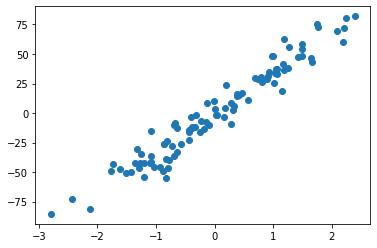

In [2]:
np.random.seed(123)
x, y  = make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x,y)

In [3]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [4]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [5]:
# Matrice X
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [6]:
# Initalisation du vecteur théta = (a,b)
theta = np.random.randn(2,1)
print(theta)

[[0.02964293]
 [2.95862545]]


In [7]:
# Modèle linéaire
def model(X, theta):
  return X.dot(theta)

In [8]:
# Test de la fonction model
print(model(X, theta)[:5,:])

[[2.955818  ]
 [2.92145676]
 [2.95870981]
 [2.989446  ]
 [2.94575   ]]


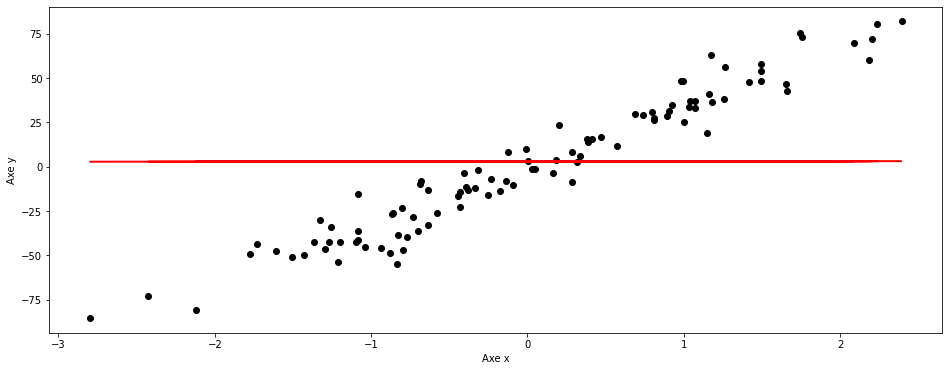

In [9]:
# Nuage de points et tendance linéaire
fig, axe = plt.subplots(figsize=(16,6))
axe.scatter(X[:,0],y,color="black")
axe.plot(X[:,0], model(X, theta), color = "red");
axe.set(xlabel="Axe x",ylabel="Axe y")
plt.show()

In [10]:
def cost_function(X, y, theta):
  m = len(y)
  return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [11]:
# test de la fonction coût
print(cost_function(X, y, theta))

779.7415024477377


In [12]:
# Gradients
def grad(X, y, theta):
  m = len(y)
  return (1/m)* X.T.dot(model(X,theta) - y)

def gradient_descent(X,y,theta,learning_rate,n_iterations):
  cost_history = np.zeros(n_iterations)
  theta_history = np.zeros((n_iterations,X.shape[1]))
  
  for i in range(0, n_iterations):
    theta = theta - learning_rate*grad(X,y,theta)
    cost_history[i] = cost_function(X,y,theta)
    theta_history[i,:] = theta.T
    return theta, cost_history, theta_history

In [13]:
# Entraînement du modèle
alpha = 0.01
n_iter = 1000
theta_final,cost_history,theta_history=gradient_descent(X,y,theta,alpha,n_iter)
print(theta_final)

[[0.46104572]
 [2.93736508]]


In [14]:
# Valeurs ajustées
predictions = model(X, theta_final)

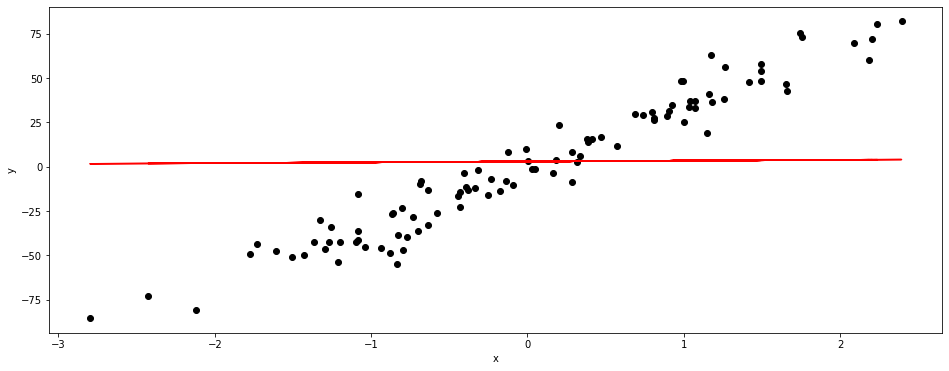

In [15]:
# Nuage de points et tendance linéaire optimale
fig, axe = plt.subplots(figsize=(16,6))
axe.scatter(X[:,0], y,color="black");
axe.plot(X[:,0], predictions, color = "red");
axe.set(xlabel="x",ylabel="y");
plt.show() 

In [16]:
import numpy as np
class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set
    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration
    """
    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations
    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """
        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]
        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self
    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_)

In [17]:
# générer un dataset aléatoire
ml = LinearRegressionUsingGD(eta=0.01,n_iterations=1000).fit(X,y)

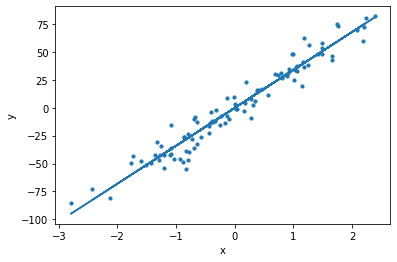

In [18]:
# tracer le graphique
plt.scatter(x,y,s=10)
plt.plot(x,ml.predict(X))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

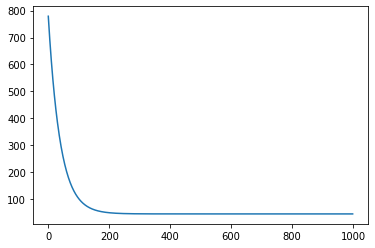

In [22]:
plt.plot(range(1000),np.array(ml.cost_))